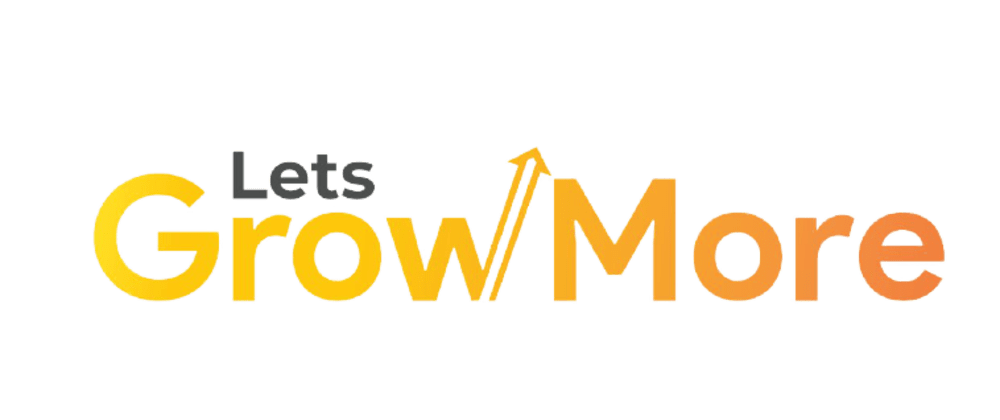

#Project: EDA on Global Terrorism Data.
by: Shaziya Shaikh


In [ ]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# importing data set
df=pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding="ISO-8859-1")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,51,53,54,55,57,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df.shape

(1210, 135)

In [ ]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
# selecting some important columns
terror=df[['iyear','imonth','iday','country','country_txt','region','region_txt', 'city', 'latitude', 'longitude',
        'attacktype1','targtype1','gname','weaptype1','nkill','nwound']]


In [ ]:
terror.head()

,iyear,imonth,iday,country,country_txt,region,region_txt,city,latitude,longitude,attacktype1,targtype1,gname,weaptype1,nkill,nwound
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1.0,14.0,MANO-D,13.0,1.0,0.0
1,1970,0,0,130,Mexico,1,North America,Mexico city,19.371887,-99.086624,6.0,7.0,23rd of September Communist League,13.0,0.0,0.0
2,1970,1,0,160,Philippines,5,Southeast Asia,Unknown,15.478598,120.599741,1.0,10.0,Unknown,13.0,1.0,0.0
3,1970,1,0,78,Greece,8,Western Europe,Athens,37.997490,23.762728,3.0,7.0,Unknown,6.0,NaN,NaN
4,1970,1,0,101,Japan,4,East Asia,Fukouka,33.580412,130.396361,7.0,7.0,Unknown,8.0,NaN,NaN


In [ ]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   iyear        1210 non-null   int64  
 1   imonth       1210 non-null   int64  
 2   iday         1210 non-null   int64  
 3   country      1210 non-null   int64  
 4   country_txt  1210 non-null   object 
 5   region       1210 non-null   int64  
 6   region_txt   1210 non-null   object 
 7   city         1210 non-null   object 
 8   latitude     1190 non-null   float64
 9   longitude    1190 non-null   float64
 10  attacktype1  1209 non-null   float64
 11  targtype1    1209 non-null   float64
 12  gname        1209 non-null   object 
 13  weaptype1    1209 non-null   float64
 14  nkill        1095 non-null   float64
 15  nwound       973 non-null    float64
dtypes: float64(7), int64(5), object(4)
memory usage: 151.4+ KB


In [ ]:
# replace nan value with 0
terror["nkill"] = terror["nkill"].replace(np.nan, 0)

<ipython-input-23-7ae9aed0b308>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror["nkill"] = terror["nkill"].replace(np.nan, 0)


In [ ]:
terror["nwound"] = terror["nwound"].replace(np.nan, 0)

<ipython-input-24-ae7ea724e79b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror["nwound"] = terror["nwound"].replace(np.nan, 0)


In [ ]:
# drop nan values
terror.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
#rename columns
terror=terror.rename(columns={"iyear": "Year","imonth":"Month","iday":"Day","country":"Country_id","country_txt":"Country"})

In [ ]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15974 entries, 0 to 16579
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         15974 non-null  int64  
 1   Month        15974 non-null  int64  
 2   Day          15974 non-null  int64  
 3   Country_id   15974 non-null  int64  
 4   Country      15974 non-null  object 
 5   region       15974 non-null  int64  
 6   region_txt   15974 non-null  object 
 7   city         15974 non-null  object 
 8   latitude     15974 non-null  float64
 9   longitude    15974 non-null  float64
 10  attacktype1  15974 non-null  int64  
 11  targtype1    15974 non-null  int64  
 12  gname        15974 non-null  object 
 13  weaptype1    15974 non-null  float64
 14  nkill        15974 non-null  float64
 15  nwound       15974 non-null  float64
dtypes: float64(5), int64(7), object(4)
memory usage: 2.1+ MB


In [ ]:
# download cleaned CSV file.
terror.to_csv("gl_terror.csv")